## O que é uma arvore de decisão?

## Carregando o dataset 

In [1]:
# Importando o dataset
import pandas as pd

In [2]:
# Importando o dataset Iris
from sklearn.datasets import load_iris

In [3]:
# Carregando o dataset Iris
dataset = load_iris()

In [4]:
# Transformando o dataset em um df
iris = pd.DataFrame(data = dataset.data, columns=['comprimento_sepala (cm)', 'largura_sepala (cm)', 'comprimento_petala (cm)', 'largura_petala (cm)'])
iris.loc[:,'target'] = dataset.target
iris.head(2)

,comprimento_sepala (cm),largura_sepala (cm),comprimento_petala (cm),largura_petala (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


<br>

## Utilizando apenas as flores representadas por 0 e 1 🌷🌹

Vamos compreender como funciona o algoritmo de machine learning **DecisionTreeClassifier** que é baseado em uma arvore de decisão. Para um melhor estudo iremos pegar apenas as flores representadas por **0** e **1**. E das 4 variáveis iremos utilizar apenas as variáveis **comprimento_petala (cm)** e **largura_petala (cm)**.

- Vamos gerar o novo dataset

In [18]:
# Neste inicio vamos trabalhar apenas com as flores representadas por 0 e 1 e as colunas das petalas.
iris1 = iris.query('target==0 or target==1').loc[:, ['comprimento_petala (cm)', 'largura_petala (cm)', 'target']]
iris1.head(2)

,comprimento_petala (cm),largura_petala (cm),target
0,1.4,0.2,0
1,1.4,0.2,0


In [19]:
# Separando X e Y
x = iris1.drop('target', axis=1)
y = iris1['target']

 <br>

- Vamos utilizar o train_test_split para separar os nossos dados em treino e teste

In [20]:
# Splitando os nossos dados para treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

 <br>

- Agora vamos visulisar os dados de treino utilisando o matplotlib

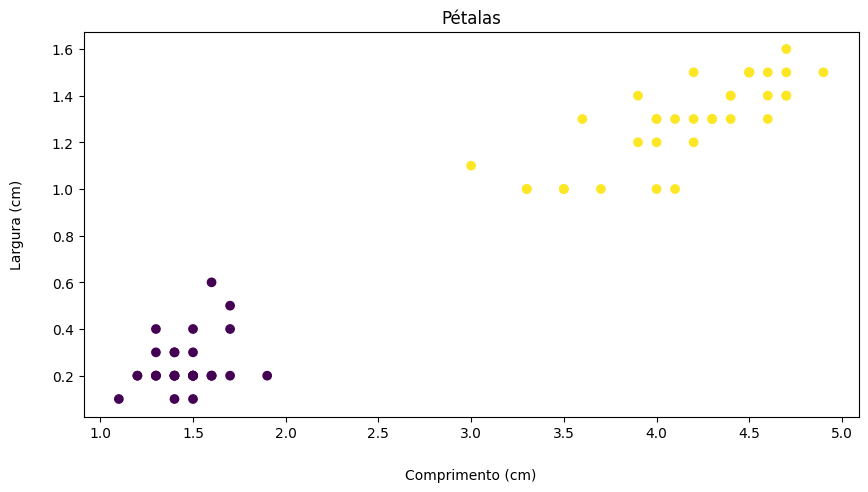

In [21]:
# Visualisando como os nossos dados estão classificados
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(data= X_train,
           x='comprimento_petala (cm)', 
           y='largura_petala (cm)',
           c= y_train)

ax.set_title('Pétalas')
ax.set_xlabel('Comprimento (cm)', labelpad=20)
ax.set_ylabel('Largura (cm)', labelpad=20)

plt.show()

 <br>

- Agora vamos utilisar a arvore de decisão para ver ela classificando esse dados.

In [22]:
# Importando a arvore de decisão
from sklearn import tree

In [23]:
# Criando o classificador
clf = tree.DecisionTreeClassifier()

In [24]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

In [25]:
# Verificando o score
clf.score(X_train, y_train)

1.0

<br>

- Podemos exibir como essa arvore foi criada

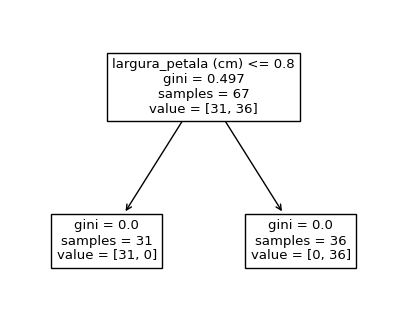

In [28]:
# Visualisando a arvore
fig, ax = plt.subplots(figsize=(5, 4))
tree.plot_tree(clf, feature_names=X_train.columns)
plt.show()

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 1.

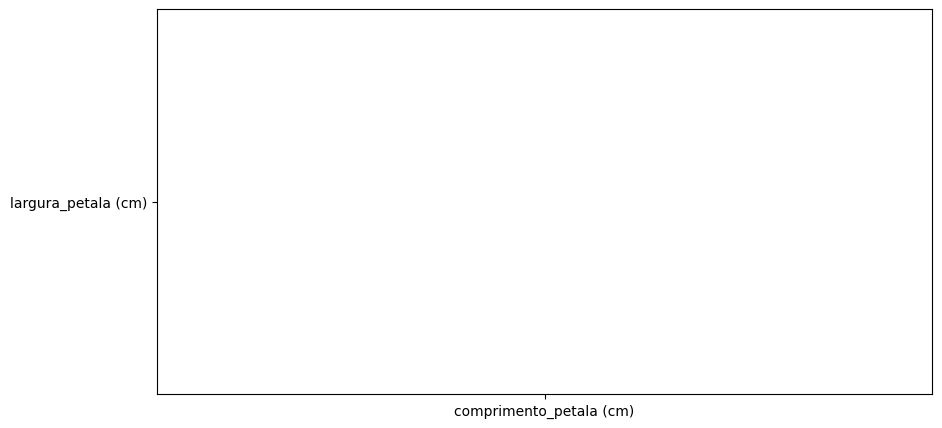

In [77]:
# Vamos visualisar como essa regra se implementa no nosso gráfico
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data=X_train, 
           x='comprimento_petala (cm)', 
           y='largura_petala (cm)',
           c=y_train)

# Traçando uma linha
ax.plot([2.45, 2.45], [0.10, 1.6], '--r')

# Titulo e labels
ax.set_title('Pétalas')
ax.set_xlabel('Comprimento (cm)', labelpad=20)
ax.set_ylabel('Largura (cm)', labelpad=20)


plt.show()

<br>

- Utilizando o modelo para prever o y dos nossos dados de teste.

In [160]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred) 

array([[19,  0],
       [ 0, 14]])

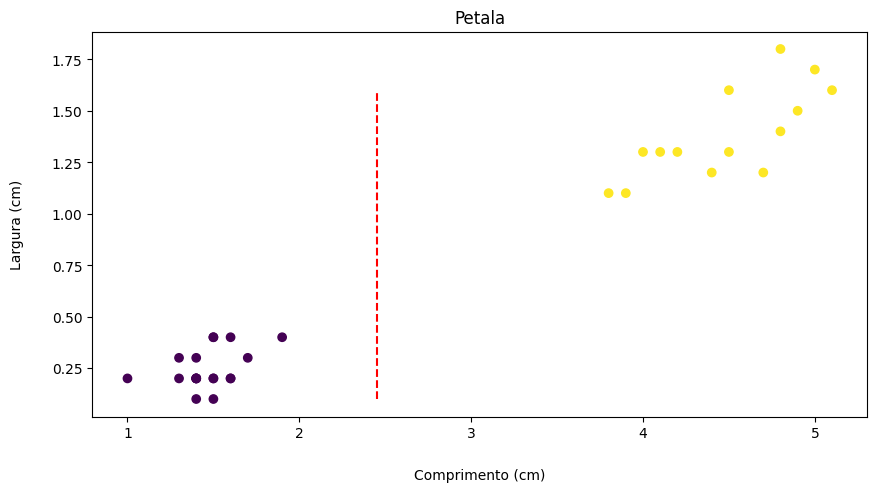

In [161]:
# Visualizando esses dados de teste no gráfico
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data=X_test,
           x='comprimento_petala (cm)', 
           y='largura_petala (cm)',
           c=y_pred)

# Traçando uma linha
ax.plot([2.45, 2.45], [0.10, 1.6], '--r')

# Titulo e labels
ax.set_title('Petala')
ax.set_xlabel('Comprimento (cm)', labelpad=20)
ax.set_ylabel('Largura (cm)', labelpad=20)


plt.show()

## Utilizando apenas as flores representadas por 1 e 2 🌹🌼

Vamos fazer a mesmo processo que fizemos no tópico anterior, mas dessa vez iremos utilizar as flores representadas por **1** e **2**. E as mesmas variáveis.

- Vamos gerar o novo dataset

In [5]:
# Separando os dados que queremos analisar
iris2 = iris.query("target==1 or target==2").loc[:,['comprimento_petala (cm)', 'largura_petala (cm)', 'target']]
iris2.head(3)

,comprimento_petala (cm),largura_petala (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1


In [6]:
# Separando x e y 
x = iris2.drop(labels='target', axis=1)
y = iris2['target']

<br>

- Agora vamos separar os nossos dados em dados de treino e teste

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<br>

- Vamos visualisar os dadados de treino utilizando o matplotlib

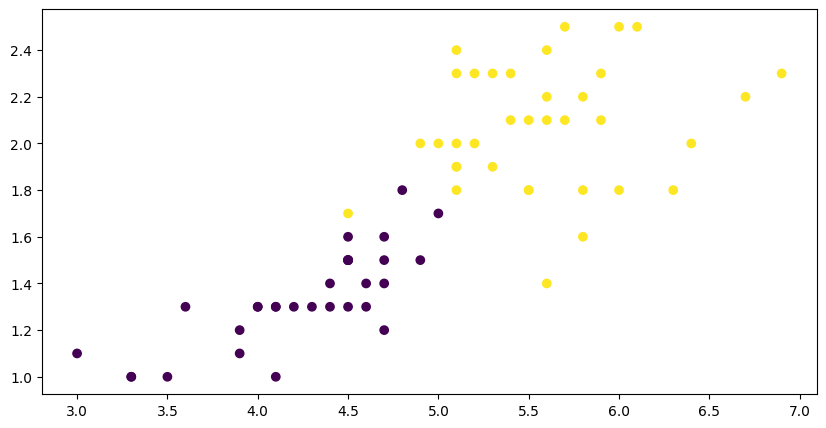

In [8]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10, 5))

ax.scatter(data=X_train,
           x='comprimento_petala (cm)',
           y='largura_petala (cm)',
           c=y_train)

plt.show()

- Agora vamos utilisar a arvore de decisão para ver ela classificando esse dados.

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [10]:
clf = clf.fit(X_train, y_train)

- Visualisando a arvore de decisão criada.

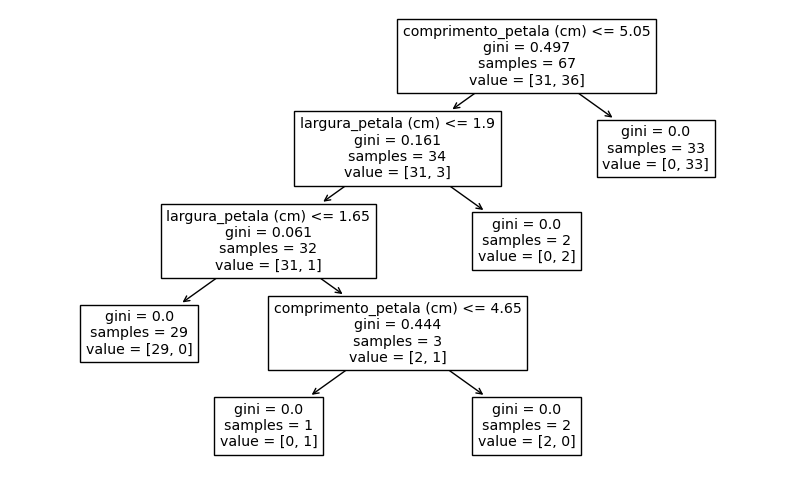

In [15]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 6))
tree.plot_tree(clf, feature_names=X_train.columns)
plt.show()

- Utilizando o modelo para prever o y dos nossos dados de teste.

In [18]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred) 

array([[18,  1],
       [ 6,  8]])

In [23]:
# Acertos totais
(y_pred == y_test).mean().round(2)

0.79

## Utilizando todas as flores

In [5]:
# Separando em X e Y
x = iris.drop('target', axis=1)
y = iris.target

In [6]:
# Separando os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 13]])

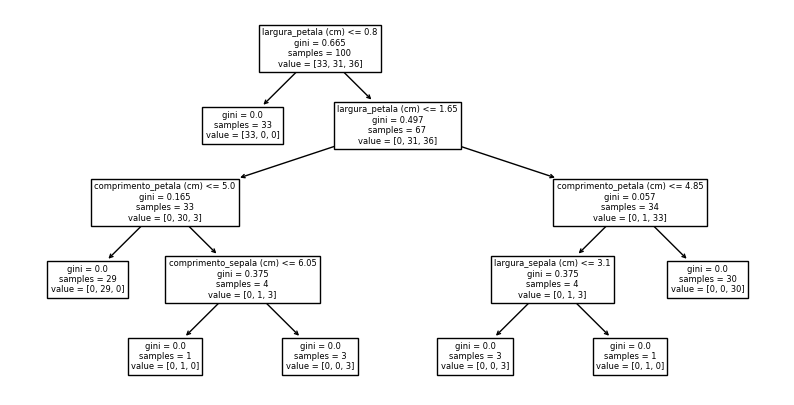

In [11]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 5))
tree.plot_tree(clf, feature_names=X_train.columns)
plt.show()